In [82]:
# load up modules
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [37]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
!pip install keras

In [16]:
!pip install keras-tuner

In [3]:
!pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=dbcbacdaf6510df7ffaa6441537af2c7847b36cd16a88c05e7e69da35d4225ca
  Stored in directory: c:\users\stephen\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [4]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [5]:
start = datetime.datetime(2020,2,1)
end = datetime.datetime(2020,10,11)

In [11]:
from datetime import date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

today = date.today()
today - relativedelta(years=5)

datetime.date(2017, 3, 3)

In [20]:
start = datetime.datetime(2017,3,2)
end = datetime.datetime(2022,3,3)

In [21]:

Symbols = ['^GSPC']

# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : ^GSPC,

In [22]:
stock_final

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2017-03-02,2394.750000,2394.750000,2380.169922,2381.919922,2381.919922,3821320000,^GSPC
2017-03-03,2380.919922,2383.889893,2375.389893,2383.120117,2383.120117,3555260000,^GSPC
2017-03-06,2375.229980,2378.800049,2367.979980,2375.310059,2375.310059,3232700000,^GSPC
2017-03-07,2370.739990,2375.120117,2365.510010,2368.389893,2368.389893,3518390000,^GSPC
2017-03-08,2369.810059,2373.090088,2361.010010,2362.979980,2362.979980,3812100000,^GSPC
...,...,...,...,...,...,...,...
2022-02-24,4155.770020,4294.729980,4114.649902,4288.700195,4288.700195,5070560000,^GSPC
2022-02-25,4298.379883,4385.339844,4286.830078,4384.649902,4384.649902,3941780000,^GSPC
2022-02-28,4354.169922,4388.839844,4315.120117,4373.939941,4373.939941,4594010000,^GSPC


In [26]:
df = stock_final.filter(['Date','Adj Close', 'Volume'], axis=1)

df.head()

,Adj Close,Volume
Date,,
2017-03-02,2381.919922,3821320000
2017-03-03,2383.120117,3555260000
2017-03-06,2375.310059,3232700000
2017-03-07,2368.389893,3518390000
2017-03-08,2362.979980,3812100000


<AxesSubplot:title={'center':'Adjusted Closing SP500'}, xlabel='Date'>

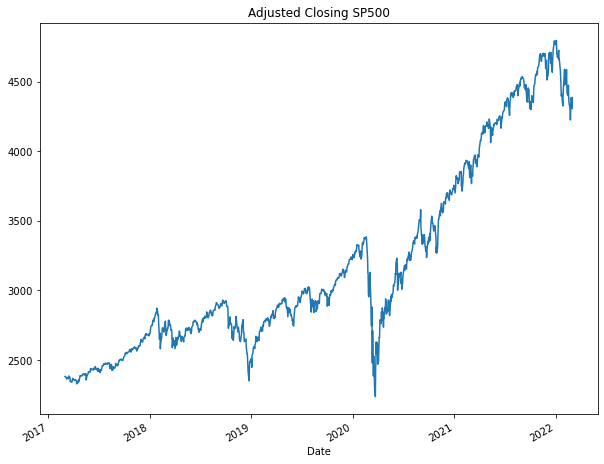

In [31]:
df['Adj Close'].plot(figsize=(10,8), title = 'Adjusted Closing SP500')

<AxesSubplot:xlabel='Date'>

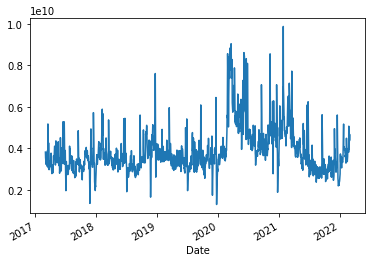

In [28]:
df['Volume'].plot()

In [33]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-02 to 2022-03-02
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1260 non-null   float64
 1   Volume     1260 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 29.5 KB


,Adj Close,Volume
count,1260.000000,1.260000e+03
mean,3191.651276,3.868666e+09
std,690.211618,1.067300e+09
min,2237.399902,1.296540e+09
25%,2694.637390,3.234158e+09
50%,2921.169922,3.590000e+09
75%,3640.635071,4.156200e+09
max,4796.560059,9.878040e+09


In [34]:
#Add bollinger bands

df['middle_band'] = df['Adj Close'].rolling(window=20).mean()
df['upper_band'] = df['Adj Close'].rolling(window=20).mean() + df['Adj Close'].rolling(window=20).std()*2
df['lower_band'] = df['Adj Close'].rolling(window=20).mean() - df['Adj Close'].rolling(window=20).std()*2

<Figure size 720x720 with 0 Axes>

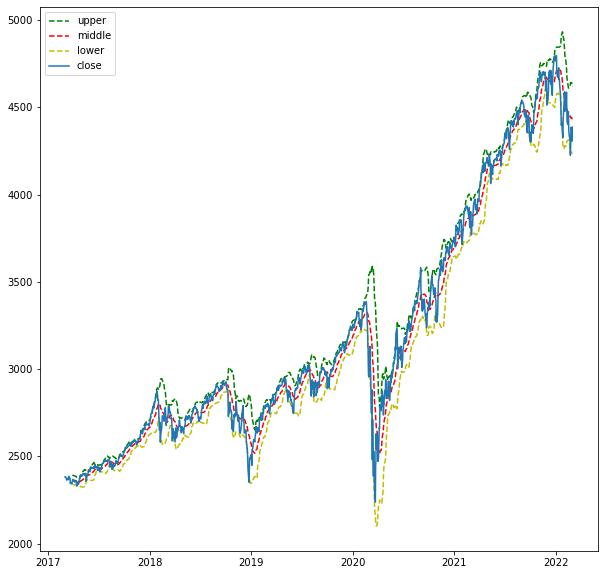

In [38]:
plt.figure(figsize=(10,10))
plt.plot(df['upper_band'], 'g--', label="upper")
plt.plot(df['middle_band'], 'r--', label="middle")
plt.plot(df['lower_band'], 'y--', label="lower")
plt.plot(df['Adj Close'], label="close")
plt.legend()
plt.show()

<Figure size 720x720 with 0 Axes>

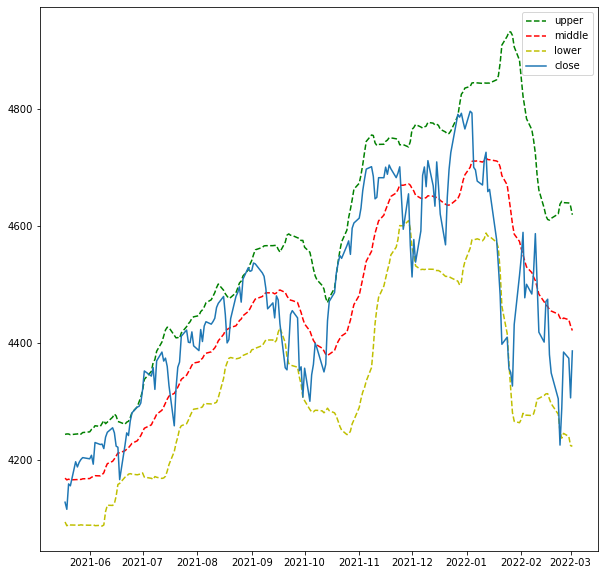

In [39]:
#Plot Bollinger Bands

plt.figure(figsize=(10,10))
plt.plot(df['upper_band'].iloc[-200:], 'g--', label="upper")
plt.plot(df['middle_band'].iloc[-200:], 'r--', label="middle")
plt.plot(df['lower_band'].iloc[-200:], 'y--', label="lower")
plt.plot(df['Adj Close'].iloc[-200:], label="close")
plt.legend()
plt.show()

In [70]:
#Prepare data for training/modeling

df1 = stock_final.filter(['Date','Adj Close'], axis=1)

#Normalize Data
from sklearn import preprocessing

x = df1[['Adj Close']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()


df1['close'] = min_max_scaler.fit_transform(x)

df = df1.filter(['Date','close'], axis=1)


scaled_data = df[['close']].values

In [74]:
#break out training and testing data

trainlen = int(len(df)*.80)

testlen = len(df) - trainlen

train_data = scaled_data[0:trainlen, :]

trainlen
len(train_data)

test_data = scaled_data[trainlen-60:, :]

testlen
len(test_data)


1008

1008

252

252

In [75]:
# break out training data into x and y

x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [79]:
#convert to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [80]:
#Reshape data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(948, 60, 1)

In [175]:
#Build LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [176]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [177]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [178]:
#Train
model.fit(x_train, y_train, batch_size=100, epochs=20)



Epoch 1/20
10/10 [==============================] - 2s 31ms/step - loss: 0.0305
Epoch 2/20
10/10 [==============================] - 0s 31ms/step - loss: 0.0059
Epoch 3/20
10/10 [==============================] - 0s 31ms/step - loss: 0.0029
Epoch 4/20
10/10 [==============================] - 0s 31ms/step - loss: 0.0017
Epoch 5/20
10/10 [==============================] - 0s 31ms/step - loss: 0.0013
Epoch 6/20
10/10 [==============================] - 0s 31ms/step - loss: 0.0011
Epoch 7/20
10/10 [==============================] - 0s 33ms/step - loss: 0.0011
Epoch 8/20
10/10 [==============================] - 0s 32ms/step - loss: 9.9273e-04
Epoch 9/20
10/10 [==============================] - 0s 31ms/step - loss: 9.7230e-04
Epoch 10/20
10/10 [==============================] - 0s 31ms/step - loss: 9.5788e-04
Epoch 11/20
10/10 [==============================] - 0s 31ms/step - loss: 9.4442e-04
Epoch 12/20
10/10 [==============================] - 0s 31ms/step - loss: 9.0352e-04
Epoch 13/20
10/10

In [180]:
model1 = model

In [89]:
#Format test data

test_data = scaled_data[trainlen-60:, :]

#create x test and y test
x_test = []
y_test = x[trainlen:, :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [90]:
#convert to numpy arrays

x_test = np.array(x_test)

In [91]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [152]:
x_test.shape
y_test.shape

(252, 60, 1)

(252, 1)

In [96]:
predictions = model.predict(x_test)
predictions = min_max_scaler.inverse_transform(predictions)

In [137]:
# Get RMSE

import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, predictions))

179.06019493275696

C:\Users\Stephen\AppData\Local\Temp/ipykernel_28856/3141232054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


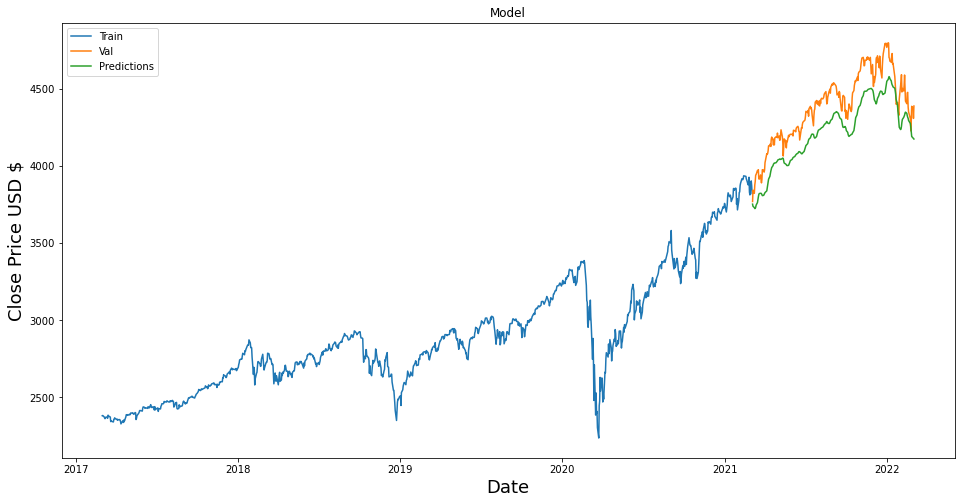

In [111]:
#break data for plotting

train = df1[:trainlen]
valid = df1[trainlen:]
valid['Predictions'] = predictions


#Plot Data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show();

In [112]:
valid

,Adj Close,close,Predictions
Date,,,
2021-03-04,3768.469971,0.598271,3751.284180
2021-03-05,3841.939941,0.626979,3737.319336
2021-03-08,3821.350098,0.618934,3729.202881
2021-03-09,3875.439941,0.640069,3722.787109
2021-03-10,3898.810059,0.649201,3723.769775
...,...,...,...
2022-02-24,4288.700195,0.801552,4216.395996
2022-02-25,4384.649902,0.839045,4189.761719
2022-02-28,4373.939941,0.834860,4179.208496


In [113]:
# Modify RNN
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [114]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.fit(x_train, y_train, batch_size=50, epochs=20, verbose=1)

Epoch 1/20
19/19 [==============================] - 3s 30ms/step - loss: 0.0222
Epoch 2/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0040
Epoch 3/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0017
Epoch 4/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0015
Epoch 5/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0014
Epoch 6/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0014
Epoch 7/20
19/19 [==============================] - 1s 32ms/step - loss: 0.0012
Epoch 8/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0012
Epoch 9/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0011
Epoch 10/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0010
Epoch 11/20
19/19 [==============================] - 1s 30ms/step - loss: 9.9401e-04
Epoch 12/20
19/19 [==============================] - 1s 30ms/step - loss: 9.1790e-04
Epoch 13/20
19/19 [==========

In [130]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict.shape

(948, 1)

In [132]:
y_train_compare = np.reshape(y_train, (y_train.shape[0], 1))

In [133]:
y_train_compare.shape

(948, 1)

In [134]:
train_predict = min_max_scaler.inverse_transform(train_predict)
test_predict = min_max_scaler.inverse_transform(test_predict)

y_train_compare = min_max_scaler.inverse_transform(y_train_compare)

In [136]:
#Train RMSE
np.sqrt(mean_squared_error(y_train_compare, train_predict))

#Test RMSE
np.sqrt(mean_squared_error(y_test, test_predict))

66.57599155322991

122.35071877228127

In [131]:
y_train.shape

(948,)

C:\Users\Stephen\AppData\Local\Temp/ipykernel_28856/1813431524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions2'] = test_predict
C:\Users\Stephen\AppData\Local\Temp/ipykernel_28856/1813431524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Predictions1'] = train_predict


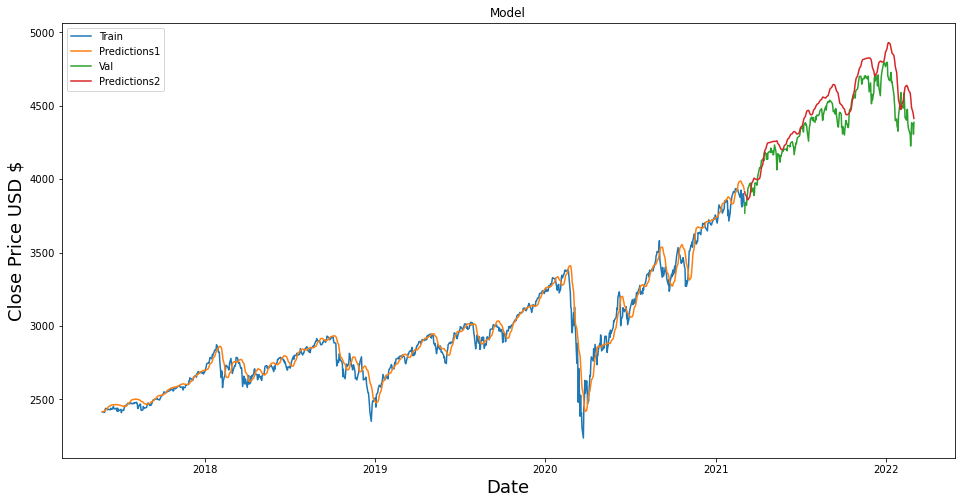

In [187]:
#break data for plotting

train = df1[60:trainlen]
valid = df1[trainlen:]
valid['Predictions2'] = test_predict
train['Predictions1'] = train_predict

#Plot Data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train[['Adj Close', 'Predictions1']])
plt.plot(valid[['Adj Close', 'Predictions2']])
plt.legend(['Train', 'Predictions1', 'Val', 'Predictions2'])
plt.show();

Predict Data for next 30 days

In [155]:
test_data.shape

312-60

(312, 1)

252

In [156]:
x_input = test_data[252:].reshape(1,-1)

x_input.shape

(1, 60)

In [159]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [160]:
temp_input

[0.9199385250593379,
 0.9570913690862328,
 0.9627416449793555,
 0.9495499087988155,
 0.9669657098810187,
 0.9501438612826167,
 0.9365142449381434,
 0.9661178059818818,
 0.9500265208465302,
 0.93125872898366,
 0.910697250227049,
 0.942430301688939,
 0.9609246807958542,
 0.9723463889673278,
 0.9979016095673476,
 0.9960104251730533,
 0.9986323638278547,
 0.9930328400583075,
 0.9881289638171702,
 1.0,
 0.9988199177281365,
 0.9624955162597593,
 0.9607252974532354,
 0.9532931641087086,
 0.9506595868090268,
 0.9673759244136793,
 0.9725652336505659,
 0.9462596066519624,
 0.9477524059559332,
 0.9142491356875195,
 0.8969191934609895,
 0.8773698952140365,
 0.8442379167970449,
 0.8490011753123354,
 0.8280256660739225,
 0.8254779476299139,
 0.8163263476024392,
 0.857488418594357,
 0.8901943462897526,
 0.9023038792938967,
 0.9190436849857664,
 0.8753027955643407,
 0.8843252257133916,
 0.8778154072762516,
 0.8925350494928603,
 0.9181841424417494,
 0.8857125140236131,
 0.8523265841912857,
 0.845695418

In [162]:
#predict for next 30 days
from numpy import array

lst_output=[]
n_steps=60
i=0

while(i<30):
    
    if(len(temp_input)>60):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i+=1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i+=1

[0.84682256]
61
1 day input [0.95709137 0.96274164 0.94954991 0.96696571 0.95014386 0.93651424
 0.96611781 0.95002652 0.93125873 0.91069725 0.9424303  0.96092468
 0.97234639 0.99790161 0.99601043 0.99863236 0.99303284 0.98812896
 1.         0.99881992 0.96249552 0.9607253  0.95329316 0.95065959
 0.96737592 0.97256523 0.94625961 0.94775241 0.91424914 0.89691919
 0.8773699  0.84423792 0.84900118 0.82802567 0.82547795 0.81632635
 0.85748842 0.89019435 0.90230388 0.91904368 0.8753028  0.88432523
 0.87781541 0.89253505 0.91818414 0.88571251 0.85232658 0.84569542
 0.87281365 0.8743532  0.83732933 0.82506373 0.80782747 0.77685646
 0.80155214 0.83904479 0.83485984 0.8084136  0.83978337 0.84682256]
1 day output [[0.8468799]]
2 day input [0.96274164 0.94954991 0.96696571 0.95014386 0.93651424 0.96611781
 0.95002652 0.93125873 0.91069725 0.9424303  0.96092468 0.97234639
 0.99790161 0.99601043 0.99863236 0.99303284 0.98812896 1.
 0.99881992 0.96249552 0.9607253  0.95329316 0.95065959 0.96737592
 0

16 day output [[0.9885828]]
17 day input [0.99303284 0.98812896 1.         0.99881992 0.96249552 0.9607253
 0.95329316 0.95065959 0.96737592 0.97256523 0.94625961 0.94775241
 0.91424914 0.89691919 0.8773699  0.84423792 0.84900118 0.82802567
 0.82547795 0.81632635 0.85748842 0.89019435 0.90230388 0.91904368
 0.8753028  0.88432523 0.87781541 0.89253505 0.91818414 0.88571251
 0.85232658 0.84569542 0.87281365 0.8743532  0.83732933 0.82506373
 0.80782747 0.77685646 0.80155214 0.83904479 0.83485984 0.8084136
 0.83978337 0.84682256 0.8468799  0.84984821 0.85503203 0.86182052
 0.86974192 0.87846875 0.8877883  0.89757276 0.90775323 0.91829419
 0.92917854 0.9403972  0.95194793 0.96382886 0.97604024 0.98858279]
17 day output [[1.0014588]]
18 day input [0.98812896 1.         0.99881992 0.96249552 0.9607253  0.95329316
 0.95065959 0.96737592 0.97256523 0.94625961 0.94775241 0.91424914
 0.89691919 0.8773699  0.84423792 0.84900118 0.82802567 0.82547795
 0.81632635 0.85748842 0.89019435 0.90230388 0.9

In [165]:
len(lst_output)

30

In [169]:
day_new=np.arange(1,61)
day_pred=np.arange(61,91)

df.shape

(1260, 1)

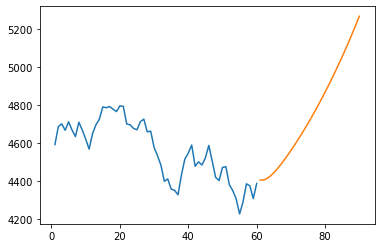

In [172]:
plt.plot(day_new, min_max_scaler.inverse_transform(df[1200:]))
plt.plot(day_pred, min_max_scaler.inverse_transform(lst_output))

In [174]:
min_max_scaler.inverse_transform(lst_output)

array([[4404.55445688],
       [4404.70119828],
       [4412.29758231],
       [4425.56379757],
       [4442.93663633],
       [4463.20876167],
       [4485.54213074],
       [4509.392336  ],
       [4534.43233636],
       [4560.48579807],
       [4587.46180859],
       [4615.31658956],
       [4644.02695523],
       [4673.58710916],
       [4703.99232268],
       [4735.24320595],
       [4767.3415894 ],
       [4800.2932695 ],
       [4834.10877133],
       [4868.80167077],
       [4904.38783176],
       [4940.89440602],
       [4978.3497656 ],
       [5016.78045208],
       [5056.22124409],
       [5096.70661516],
       [5138.27103886],
       [5180.9532598 ],
       [5224.79354795],
       [5269.8248515 ]])

In [182]:
# Re run with first model

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [183]:
x_input = test_data[252:].reshape(1,-1)

x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

(1, 60)

In [184]:
#predict for next 30 days
from numpy import array

lst_output=[]
n_steps=60
i=0

while(i<30):
    
    if(len(temp_input)>60):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        yhat = model1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i+=1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat=model1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i+=1

[0.83972377]
61
1 day input [0.95709137 0.96274164 0.94954991 0.96696571 0.95014386 0.93651424
 0.96611781 0.95002652 0.93125873 0.91069725 0.9424303  0.96092468
 0.97234639 0.99790161 0.99601043 0.99863236 0.99303284 0.98812896
 1.         0.99881992 0.96249552 0.9607253  0.95329316 0.95065959
 0.96737592 0.97256523 0.94625961 0.94775241 0.91424914 0.89691919
 0.8773699  0.84423792 0.84900118 0.82802567 0.82547795 0.81632635
 0.85748842 0.89019435 0.90230388 0.91904368 0.8753028  0.88432523
 0.87781541 0.89253505 0.91818414 0.88571251 0.85232658 0.84569542
 0.87281365 0.8743532  0.83732933 0.82506373 0.80782747 0.77685646
 0.80155214 0.83904479 0.83485984 0.8084136  0.83978337 0.83972377]
1 day output [[0.8386626]]
2 day input [0.96274164 0.94954991 0.96696571 0.95014386 0.93651424 0.96611781
 0.95002652 0.93125873 0.91069725 0.9424303  0.96092468 0.97234639
 0.99790161 0.99601043 0.99863236 0.99303284 0.98812896 1.
 0.99881992 0.96249552 0.9607253  0.95329316 0.95065959 0.96737592
 0

16 day output [[0.88243836]]
17 day input [0.99303284 0.98812896 1.         0.99881992 0.96249552 0.9607253
 0.95329316 0.95065959 0.96737592 0.97256523 0.94625961 0.94775241
 0.91424914 0.89691919 0.8773699  0.84423792 0.84900118 0.82802567
 0.82547795 0.81632635 0.85748842 0.89019435 0.90230388 0.91904368
 0.8753028  0.88432523 0.87781541 0.89253505 0.91818414 0.88571251
 0.85232658 0.84569542 0.87281365 0.8743532  0.83732933 0.82506373
 0.80782747 0.77685646 0.80155214 0.83904479 0.83485984 0.8084136
 0.83978337 0.83972377 0.83866262 0.83878273 0.83976644 0.84139192
 0.84350526 0.84599823 0.84879577 0.85184455 0.85510719 0.85855722
 0.86217618 0.86595052 0.86987048 0.87392843 0.87811929 0.88243836]
17 day output [[0.88688225]]
18 day input [0.98812896 1.         0.99881992 0.96249552 0.9607253  0.95329316
 0.95065959 0.96737592 0.97256523 0.94625961 0.94775241 0.91424914
 0.89691919 0.8773699  0.84423792 0.84900118 0.82802567 0.82547795
 0.81632635 0.85748842 0.89019435 0.90230388 0

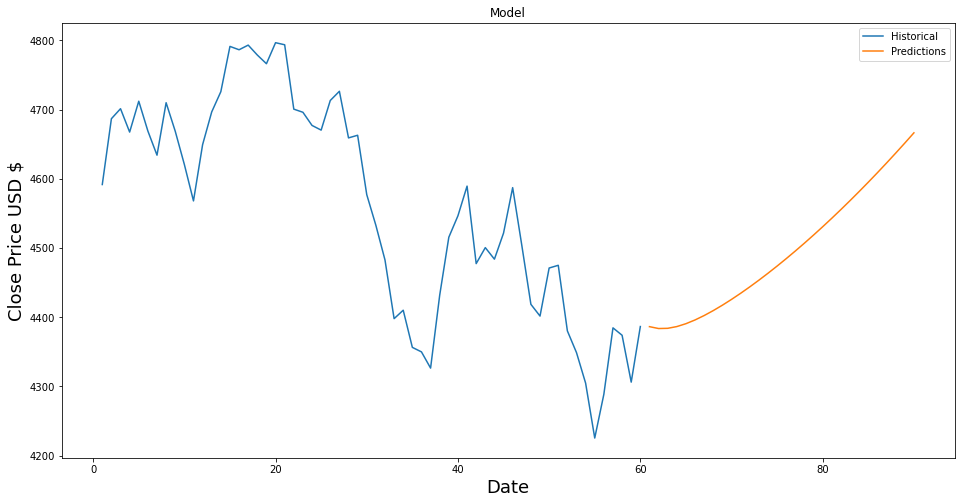

In [190]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.plot(day_new, min_max_scaler.inverse_transform(df[1200:]))
plt.plot(day_pred, min_max_scaler.inverse_transform(lst_output))
plt.legend(['Historical', 'Predictions'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show;

Both LSTM models have not captured volatility of sp500 index.